# Project 2020
## Fundamentals of data analytics
### Eoin Lees - (student number)
--------------

In [20]:
import pandas as pd

import matplotlib.style as style
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
style.use('fivethirtyeight')

In [4]:
dfpowprod = pd.read_csv("https://raw.githubusercontent.com/eoinlees/FoDA-Project-2020/main/powerproduction.csv")
dfpowprod


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


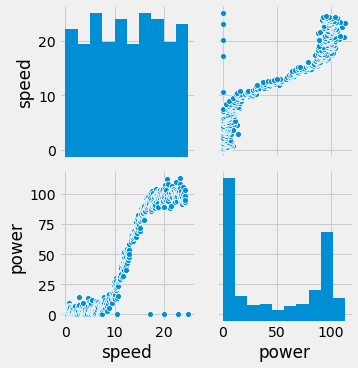

In [5]:
sns.pairplot(dfpowprod);

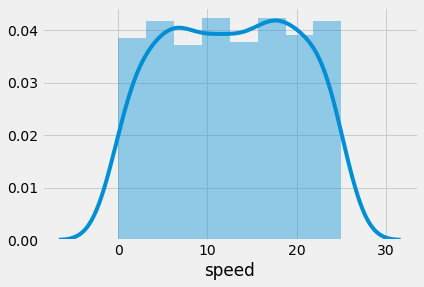

In [6]:
sns.distplot(dfpowprod["speed"], kde=True);

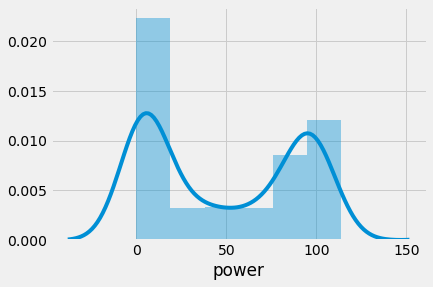

In [7]:
sns.distplot(dfpowprod["power"], kde=True);

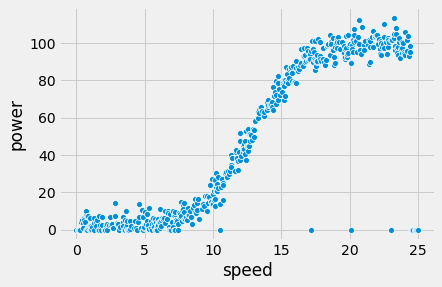

In [8]:
sns.scatterplot(data=dfpowprod, x="speed", y="power");

Explination + analysis

Loads of analysis! Explain everything

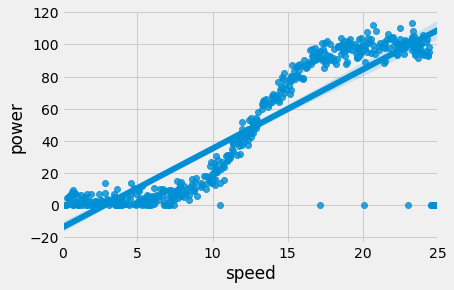

In [9]:
sns.regplot(x="speed", y="power", data=dfpowprod);

 ## https://seaborn.pydata.org/tutorial/regression.html
 
 Refer to this for correct plots
 
 research complex linear regression - curved lines
 
 https://seaborn.pydata.org/generated/seaborn.regplot.html
 
 --------------

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

linear regression model? 

In [18]:
# Perform linear regression
lr = LinearRegression()

# convert data into numpy array
X = dfpowprod.speed.values.reshape(-1, 1)
Y = dfpowprod.power.values.reshape(-1, 1)


lr.fit(X, Y)

# Y predictions off of X values
Y_pred = lr.predict(X)


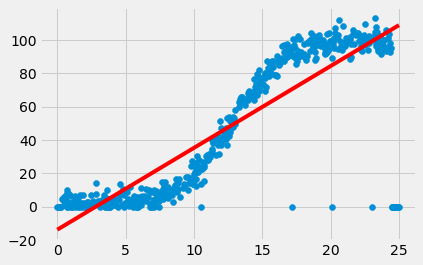

In [22]:
# Visualise the results

# create scatterplot from dataset
plt.scatter(X,Y)

# create regression line
plt.plot(X, Y_pred, color='red')

# show plot
plt.show()

 linik to plot above https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d